In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 702.4 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 6.1 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from ultralytics import YOLO
import torch

In [3]:
model=YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 160MB/s] 


In [25]:
if os.path.exists('data'):
    shutil.rmtree('data')
shutil.copytree('/kaggle/input/brain-tumor-object-detection-datasets/axial_t1wce_2_class/', 'data')

'data'

In [26]:
train_img=(os.listdir('data/images/train'))
test_img=(os.listdir('data/images/test'))
train_label=(os.listdir('data/labels/train'))
test_label=(os.listdir('data/labels/test'))
print(len(train_img), len(train_label))
print(len(test_img), len(test_label))

310 296
75 75


In [27]:
label_basenames = set(os.path.splitext(f)[0] for f in train_label)
for image_file in train_img:
    image_basename = os.path.splitext(image_file)[0]
    if image_basename not in label_basenames:
        image_path = os.path.join('data/images/train', image_file)
        os.remove(image_path)

In [28]:
train_img=(os.listdir('data/images/train'))
test_img=(os.listdir('data/images/test'))
train_label=(os.listdir('data/labels/train'))
test_label=(os.listdir('data/labels/test'))
print(len(train_img), len(train_label))
print(len(test_img), len(test_label))

296 296
75 75


In [29]:
text = """
path: /kaggle/working/data
train: images/train
val: images/test

# Classes
nc: 2
names: ['negative','positive']
"""
with open("/kaggle/working/data/dataset.yaml", 'w') as file:
    file.write(text)

In [30]:
# model.train(data='/kaggle/working/data/dataset.yaml', epochs=75, imgsz=640, device=torch.device('cuda'))
model.tune(data='/kaggle/working/data/dataset.yaml', epochs=10, iterations=20, optimizer="AdamW", plots=False, save=False, val=False, device=torch.device('cuda'))

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune4'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/20 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train23/weights/best.pt, data=/kaggle/working/data/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=False, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=AdamW, v

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_080446-gnznr4iu
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train25
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/gnznr4iu


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<00:00, 1284.08it/s]


train: New cache created: /kaggle/working/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1097.65it/s]


val: New cache created: /kaggle/working/data/labels/test.cache
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train25
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.24G     0.9513     0.8827      1.029          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.12G      1.132      1.197       1.13          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.14G      1.154       1.19      1.158          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.27G      1.224      1.282      1.182          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.14G      1.182      1.261      1.147          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.144      1.084      1.135          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.13G      1.145      1.107      1.146          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.076      1.061      1.091          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.027      1.022      1.083          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.14G     0.9892     0.8791      1.044          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]


                   all         75         81       0.67      0.904      0.774      0.529

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train25/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train25/weights/best.pt, 22.5MB

Validating runs/detect/train25/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


                   all         75         81       0.67      0.901      0.774      0.529
              negative         75         81       0.67      0.901      0.774      0.529
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 1
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_080623-faoi8yww
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train26
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/faoi8yww


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01044, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00049), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train26
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G     0.9244      1.479     0.7224          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.12G      1.122      1.855     0.8114          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.156      1.874     0.8437          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.12G      1.171      1.883     0.8425          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.202      1.802     0.8399          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G       1.16       1.73     0.8204          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.128      1.635     0.8127          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.164      1.629     0.8172          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.12G      1.076      1.481     0.8144          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G       1.01      1.367     0.7661          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]


                   all         75         81      0.813      0.877      0.864      0.535

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train26/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train26/weights/best.pt, 22.5MB

Validating runs/detect/train26/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]


                   all         75         81      0.813      0.877      0.864      0.538
              negative         75         81      0.813      0.877      0.864      0.538
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 2
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_080800-sch89he8
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train27
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/sch89he8


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01044, momentum=0.93805) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00049), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train27
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.027      1.485     0.7916          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.242      1.741     0.8751          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G       1.32      1.669     0.9483          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.356      1.763     0.9603          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.373      1.719     0.9469          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.361      1.754     0.9188          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.242      1.637     0.8956          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.195      1.495     0.8496          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G       1.15      1.443     0.8466          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G       1.07      1.328     0.8045          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


                   all         75         81      0.775      0.765      0.826      0.512

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train27/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train27/weights/best.pt, 22.5MB

Validating runs/detect/train27/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         75         81      0.775      0.765      0.826      0.512
              negative         75         81      0.775      0.765      0.826      0.512
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 3
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_080937-wqvd5ml6
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train28
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/wqvd5ml6


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01079, momentum=0.92003) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00036), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train28
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.125      1.411     0.6996          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.12G      1.326      1.839     0.7876          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.403      1.874     0.8324          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.12G      1.388      1.835     0.8223          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G       1.42      1.772     0.8027          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.297      1.652     0.7626          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.384      1.733     0.8214          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.282      1.579     0.7553          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.12G      1.243      1.519     0.7651          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.122      1.361     0.7139          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]


                   all         75         81      0.835      0.749      0.806       0.45

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train28/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train28/weights/best.pt, 22.5MB

Validating runs/detect/train28/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


                   all         75         81      0.835      0.749      0.806       0.45
              negative         75         81      0.835      0.749      0.806       0.45
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 4
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_081114-1455upan
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train29
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/1455upan


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01358, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00044), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train29
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.063      1.875     0.7265          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.489      2.594     0.9121          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.413      2.349     0.8941          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.485      2.411     0.9092          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.414      2.186     0.8841          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G       1.36      2.139     0.8535          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.359      2.065     0.8741          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.363       2.01     0.8267          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.295      1.905     0.8277          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.239      1.837     0.7929          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]


                   all         75         81      0.804      0.864      0.904      0.605

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train29/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train29/weights/best.pt, 22.5MB

Validating runs/detect/train29/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]


                   all         75         81      0.803      0.864      0.904      0.606
              negative         75         81      0.803      0.864      0.904      0.606
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 5
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_081251-up8xlbat
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train30
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/up8xlbat


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01087, momentum=0.93872) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00047), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train30
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.019      1.328     0.7625          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.219      1.781     0.8546          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.264      1.768     0.8868          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.241      1.728     0.8831          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G       1.25       1.69     0.8657          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.172      1.595     0.8354          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.16G      1.178      1.555       0.86          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.14G      1.197      1.505     0.8221          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.123      1.401     0.8303          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G       1.05      1.326     0.7976          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


                   all         75         81      0.736      0.862      0.794      0.542

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train30/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train30/weights/best.pt, 22.5MB

Validating runs/detect/train30/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         75         81      0.736      0.862      0.794      0.541
              negative         75         81      0.736      0.862      0.794      0.541
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 6
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_081428-vcw4pc0n
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train31
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/vcw4pc0n


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01025, momentum=0.94993) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00048), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train31
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.181      1.495     0.8391          8        640: 100%|██████████| 19/19 [00:06<00:00,  3.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.283      1.767     0.8844          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.323      1.654      0.951          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.12G      1.435      1.657     0.9765          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.445      1.716     0.9621          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.286      1.546      0.877          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.315      1.478     0.9181          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.293      1.404      0.878          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.12G       1.23      1.373     0.8902          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.172      1.254     0.8606          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]


                   all         75         81      0.854      0.741      0.843      0.547

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train31/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train31/weights/best.pt, 22.5MB

Validating runs/detect/train31/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]


                   all         75         81      0.857      0.741      0.843      0.547
              negative         75         81      0.857      0.741      0.843      0.547
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 7
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_081605-niyqvy1e
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train32
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/niyqvy1e


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01079, momentum=0.90073) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00034), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train32
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.019      1.371     0.7185          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.28G      1.251      1.716     0.7842          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G       1.26      1.873      0.822          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.289      1.927     0.8258          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G       1.28      1.762     0.7944          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.302      1.754     0.8019          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.16G      1.217      1.647     0.7983          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.14G      1.221      1.637      0.779          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.157      1.508     0.7765          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G       1.09      1.326      0.737          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


                   all         75         81      0.671      0.807      0.773      0.512

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 22.5MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         75         81      0.665      0.802      0.772      0.512
              negative         75         81      0.665      0.802      0.772      0.512
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 8
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_081742-9g2yhgha
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train33
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/9g2yhgha


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01043, momentum=0.93954) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00049), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train33
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      0.933      1.456      0.721          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.12G      1.189      1.894     0.8219          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.138      1.817     0.8447          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.162      1.793     0.8364          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.175      1.762     0.8325          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.134      1.781      0.821          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.128      1.713     0.8109          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.115      1.594     0.7729          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.085      1.545     0.8038          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.034       1.44     0.7663          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]


                   all         75         81      0.828      0.891      0.901      0.629

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train33/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train33/weights/best.pt, 22.5MB

Validating runs/detect/train33/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         75         81      0.828      0.891      0.901       0.63
              negative         75         81      0.828      0.891      0.901       0.63
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 9
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_081920-s0hxo69l
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train34
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/s0hxo69l


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01295, momentum=0.90705) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00059), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train34
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G     0.8854      1.365      1.052          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.006      1.839      1.165          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.055       1.75      1.187          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.083      1.806      1.222          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.039      1.797      1.172          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.007      1.717      1.139          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.081       1.74      1.214          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G     0.9634      1.545      1.118          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G     0.9597      1.481      1.113          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G     0.8543      1.327       1.04          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


                   all         75         81      0.795      0.765      0.787      0.488

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train34/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train34/weights/best.pt, 22.5MB

Validating runs/detect/train34/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]


                   all         75         81      0.795      0.766      0.787      0.488
              negative         75         81      0.795      0.766      0.787      0.488
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 10
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_082058-ftgnakhg
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train35
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/ftgnakhg


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01044, momentum=0.93805) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train35
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.022       1.01     0.7171          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.179       1.33     0.7991          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G       1.23      1.387     0.8289          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.307      1.432     0.8728          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.257      1.462     0.8351          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.219      1.405     0.8127          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.206       1.34     0.8317          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.189      1.247     0.7757          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.151      1.139     0.7865          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.043      1.074     0.7424          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


                   all         75         81      0.777       0.84      0.865      0.552

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train35/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train35/weights/best.pt, 22.5MB

Validating runs/detect/train35/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]


                   all         75         81      0.775       0.84      0.865      0.552
              negative         75         81      0.775       0.84      0.865      0.552
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 11
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_082235-xwc64dlh
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train36
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/xwc64dlh


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01252, momentum=0.93515) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train36
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.102      1.628      0.652          8        640: 100%|██████████| 19/19 [00:06<00:00,  3.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.12G       1.39      2.303     0.7535          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.377      2.159      0.777          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.12G      1.415      2.215     0.7941          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.388      2.055     0.7506          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.339      1.966     0.7445          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.286      1.944     0.7448          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.309      1.886     0.7222          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.12G      1.213      1.718     0.7111          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G       1.14      1.635     0.6862          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


                   all         75         81      0.778      0.777      0.833      0.514

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train36/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train36/weights/best.pt, 22.5MB

Validating runs/detect/train36/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         75         81      0.778      0.777      0.832      0.513
              negative         75         81      0.778      0.777      0.832      0.513
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 12
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_082412-15k9mx1d
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train37
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/15k9mx1d


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.00981, momentum=0.94351) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00052), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train37
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G     0.9908      1.299     0.7822          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.182      1.673     0.8701          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.268       1.61     0.9142          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.12G      1.246      1.619     0.9057          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.268      1.724     0.9109          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.154      1.532     0.8418          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.133      1.451     0.8466          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.155       1.42     0.8356          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.12G      1.084      1.278     0.8368          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.027      1.207     0.8015          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


                   all         75         81      0.754      0.852      0.829      0.585

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train37/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train37/weights/best.pt, 22.5MB

Validating runs/detect/train37/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         75         81      0.755      0.852      0.829      0.587
              negative         75         81      0.755      0.852      0.829      0.587
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 13
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_082550-28s3gjoz
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train38
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/28s3gjoz


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01044, momentum=0.95045) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train38
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G     0.9212      1.407     0.7181          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.28G      1.127      1.741     0.8197          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.169      1.815      0.848          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.183      1.858       0.86          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.193      1.726     0.8351          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.165      1.615     0.8056          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.176      1.602     0.8364          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.136      1.612     0.8118          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.119      1.506     0.8208          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.042      1.407     0.7798          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


                   all         75         81       0.78      0.877      0.893      0.587

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train38/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train38/weights/best.pt, 22.5MB

Validating runs/detect/train38/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         75         81       0.78      0.877      0.893      0.587
              negative         75         81       0.78      0.877      0.893      0.587
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 14
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_082727-82rq0z6r
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train39
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/82rq0z6r


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01076, momentum=0.87345) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00034), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train39
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.103      1.513     0.7295          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.28G       1.34      1.762     0.8042          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.483      1.934     0.8979          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.512       2.29     0.9113          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.405      1.928     0.8445          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.411      1.791     0.8342          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.444      1.706       0.88          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.377      1.607     0.8335          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.264      1.583     0.7974          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.154        1.4     0.7543          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


                   all         75         81      0.737      0.679      0.745        0.5

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train39/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train39/weights/best.pt, 22.5MB

Validating runs/detect/train39/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]


                   all         75         81      0.737      0.679      0.744      0.503
              negative         75         81      0.737      0.679      0.744      0.503
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.8ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 15
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_082904-3j0vus2z
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train40
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/3j0vus2z


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.0122, momentum=0.93269) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train40
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.364      1.735     0.7322          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.28G      1.748      2.131     0.8573          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.712      2.189     0.8686          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G       1.75      2.068     0.8687          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G        1.7      2.068     0.8374          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.644      1.942     0.8276          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.636      1.823     0.8361          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.687      1.771     0.8235          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.537      1.698     0.8057          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.436      1.593     0.7536          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


                   all         75         81      0.711      0.789      0.766      0.463

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train40/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train40/weights/best.pt, 22.5MB

Validating runs/detect/train40/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]


                   all         75         81      0.723      0.804      0.774      0.465
              negative         75         81      0.723      0.804      0.774      0.465
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 16
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_083041-4w1f9dfq
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train41
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/4w1f9dfq


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01184, momentum=0.85223) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00054), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train41
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G     0.9402       1.22     0.9866          8        640: 100%|██████████| 19/19 [00:06<00:00,  3.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.162      1.552       1.12          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.179       1.78      1.173          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.212      1.768      1.177          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.254      1.762      1.165          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.171      1.636      1.117          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.137       1.56       1.12          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.107      1.445      1.069          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.036       1.36      1.071          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G     0.9758      1.263      1.005          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


                   all         75         81      0.738      0.868      0.858      0.588

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train41/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train41/weights/best.pt, 22.5MB

Validating runs/detect/train41/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]


                   all         75         81      0.738      0.868      0.858      0.589
              negative         75         81      0.738      0.868      0.858      0.589
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 17
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_083219-a9qelzzf
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train42
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/a9qelzzf


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01415, momentum=0.93791) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00044), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train42
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G       1.22      1.835     0.8553          8        640: 100%|██████████| 19/19 [00:06<00:00,  3.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.405      2.459     0.9398          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.463      2.602      1.008          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.578      2.448      1.065          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.458       2.36     0.9797          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.372       2.15     0.9142          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.322      2.078     0.9379          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G       1.38       2.13     0.9297          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.293      1.987     0.9276          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.263      1.945     0.8923          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]


                   all         75         81      0.751       0.79      0.836      0.572

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train42/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train42/weights/best.pt, 22.5MB

Validating runs/detect/train42/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         75         81      0.753       0.79      0.833      0.571
              negative         75         81      0.753       0.79      0.833      0.571
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 18
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_083356-fz5hnlpd
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train43
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/fz5hnlpd


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01422, momentum=0.91767) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00039), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train43
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


  0%|          | 0/19 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.499      1.709     0.6385          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.13G      1.671      2.217     0.7005          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.833      2.283     0.7586          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.12G      1.822      2.383     0.7414          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G       1.87      2.464     0.7363          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.742      2.111      0.709          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.756      2.008     0.7198          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.699      1.989     0.6887          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.12G      1.573      1.861     0.6785          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.497      1.833     0.6493          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]


                   all         75         81      0.699      0.861      0.813      0.523

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train43/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train43/weights/best.pt, 22.5MB

Validating runs/detect/train43/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]


                   all         75         81      0.699      0.862      0.813      0.522
              negative         75         81      0.699      0.862      0.813      0.522
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 19
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240610_083534-dacj738f
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train44
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/dacj738f


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01574, momentum=0.96083) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00037), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train44
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.21G      1.374      2.164     0.7758          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.28G      1.677      2.746     0.9189          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.619       2.64      0.914          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.28G      1.685       2.52     0.9178          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.16G      1.603      2.389      0.882          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.549      2.299     0.8479          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.14G      1.505      2.235     0.8489          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G       1.46      2.159     0.8156          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.28G      1.432       2.07     0.8244          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.16G      1.381      2.041     0.7903          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


                   all         75         81      0.765      0.864      0.824      0.519

10 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/train44/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train44/weights/best.pt, 22.5MB

Validating runs/detect/train44/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         75         81      0.765      0.864      0.825       0.52
              negative         75         81      0.765      0.864      0.825       0.52
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 0.7ms postprocess per image


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 467, in _do_train
    self.run_callbacks("on_train_end")
  F

WARNING ❌️ training failure for hyperparameter tuning iteration 20
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=/kaggle/working/runs/detect/train23/weights/best.pt', 'data=/kaggle/working/data/dataset.yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=cuda', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retin

In [31]:
import yaml
cfg = '/kaggle/working/runs/detect/tune4/best_hyperparameters.yaml'
with open(cfg, "r") as stream:
    try:
        cfg_args = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [32]:
# hyp='/kaggle/working/runs/detect/tune3/best_hyperparameters.yaml'
model.train(data='/kaggle/working/data/dataset.yaml', epochs=50,  device=torch.device('cuda'), **cfg_args)

engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train23/weights/best.pt, data=/kaggle/working/data/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train45, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=t

train: Scanning /kaggle/working/data/labels/train.cache... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to runs/detect/train45/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train45
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.54G     0.8189     0.7072     0.9636         22        640: 100%|██████████| 19/19 [00:05<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         75         81      0.796      0.435      0.715      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       4.7G     0.8217     0.6537      0.957         27        640: 100%|██████████| 19/19 [00:04<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         75         81      0.632      0.975      0.877      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]wandb: WARNING Step only supports monotonically increasing values, use define_metric to set a custom x axis. For details see: https://wandb.me/define-metric
wandb: WARNING (User provided step: 1 is less than current step: 16. Dropping entry: {'train/box_loss': 0.81894, 'train/cls_loss': 0.70724, 'train/dfl_loss': 0.96361, '_timestamp': 1718008727.0511947}).
wandb: WARNING (User provided step: 1 is less than current step: 16. Dropping entry: {'lr/pg0': 0.00030006, 'lr/pg1': 0.00030006, 'lr/pg2': 0.00030006, '_timestamp': 1718008727.051739}).
wandb: WARNING (User provided step: 1 is less than current step: 16. Dropping entry: {'metrics/precision(B)': 0.7965, 'metrics/recall(B)': 0.43493, 'metrics/mAP50(B)': 0.71503, 'metrics/mAP50-95(B)': 0.49563, 'val/box_loss': 1.12202, 'val/cls_loss': 3.38178, 'val/dfl_loss': 1.19542, '_timestamp': 1718008728.613135}).
wandb: WARNING (User provided step: 1 is less than current step: 16. Dropping entry: {'labels': 

                   all         75         81      0.858      0.746      0.897       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.87G     0.7831      0.611     0.9479         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         75         81      0.658      0.901      0.866        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.72G     0.8399     0.6108     0.9938         24        640:  42%|████▏     | 8/19 [00:01<00:02,  3.95it/s]wandb: WARNING (User provided step: 3 is less than current step: 16. Dropping entry: {'train/box_loss': 0.79615, 'train/cls_loss': 0.614, 'train/dfl_loss': 0.95741, '_timestamp': 1718008742.1525135}).
wandb: WARNING (User provided step: 3 is less than current step: 16. Dropping entry: {'lr/pg0': 0.000896552608, 'lr/pg1': 0.000896552608, 'lr/pg2': 0.000896552608, '_timestamp': 1718008742.1529067}).
wandb: WARNING (User provided step: 3 is less than current step: 16. Dropping entry: {'metrics/precision(B)': 0.85798, 'metrics/recall(B)': 0.74587, 'metrics/mAP50(B)': 0.89693, 'metrics/mAP50-95(B)': 0.63009, 'val/box_loss': 1.14735, 'val/cls_loss': 1.85982, 'val/dfl_loss': 1.17996, '_timestamp': 1718008743.5783389}).
wandb: WARNING (User provided step: 4 is less than current step: 16. Dropping entry: {'train/box_loss': 0.7831, 'train/cls_loss': 0.61102, 'train/dfl_los

                   all         75         81      0.854      0.723      0.886      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.72G     0.8017     0.5537     0.9373         17        640: 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         75         81      0.758       0.84      0.861      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.73G     0.7953     0.5566     0.9568         35        640:  89%|████████▉ | 17/19 [00:04<00:00,  4.21it/s]wandb: WARNING (User provided step: 5 is less than current step: 16. Dropping entry: {'train/box_loss': 0.81263, 'train/cls_loss': 0.59748, 'train/dfl_loss': 0.98021, '_timestamp': 1718008754.9609885}).
wandb: WARNING (User provided step: 5 is less than current step: 16. Dropping entry: {'lr/pg0': 0.001442875184, 'lr/pg1': 0.001442875184, 'lr/pg2': 0.001442875184, '_timestamp': 1718008754.9614518}).
wandb: WARNING (User provided step: 5 is less than current step: 16. Dropping entry: {'metrics/precision(B)': 0.85415, 'metrics/recall(B)': 0.72304, 'metrics/mAP50(B)': 0.88645, 'metrics/mAP50-95(B)': 0.63213, 'val/box_loss': 1.109, 'val/cls_loss': 1.43344, 'val/dfl_loss': 1.17723, '_timestamp': 1718008756.3960853}).
wandb: WARNING (User provided step: 6 is less than current step: 16. Dropping entry: {'train/box_loss': 0.8017, 'train/cls_loss': 0.55367, 'train/dfl_lo

                   all         75         81       0.87      0.802      0.896      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.74G     0.8142     0.5753     0.9806         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         75         81      0.869      0.572      0.797      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.87G     0.7965     0.5847     0.9575         15        640: 100%|██████████| 19/19 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         75         81      0.864      0.551      0.831       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]wandb: WARNING (User provided step: 7 is less than current step: 16. Dropping entry: {'train/box_loss': 0.78332, 'train/cls_loss': 0.55812, 'train/dfl_loss': 0.95225, '_timestamp': 1718008767.8116887}).
wandb: WARNING (User provided step: 7 is less than current step: 16. Dropping entry: {'lr/pg0': 0.0014689604, 'lr/pg1': 0.0014689604, 'lr/pg2': 0.0014689604, '_timestamp': 1718008767.8120165}).
wandb: WARNING (User provided step: 7 is less than current step: 16. Dropping entry: {'metrics/precision(B)': 0.87012, 'metrics/recall(B)': 0.80247, 'metrics/mAP50(B)': 0.89606, 'metrics/mAP50-95(B)': 0.67912, 'val/box_loss': 0.97709, 'val/cls_loss': 1.05089, 'val/dfl_loss': 1.06026, '_timestamp': 1718008769.2368667}).
wandb: WARNING (User provided step: 8 is less than current step: 16. Dropping entry: {'train/box_loss': 0.8142, 'train/cls_loss': 0.57525, 'train/dfl_loss': 0.9806, '_timestamp': 1718008774.2951758}).
wandb: WARNING (User provided step: 8 is le

                   all         75         81      0.828      0.773      0.887       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.71G     0.7818     0.5695     0.9429         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         75         81       0.85      0.753      0.861      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.74G     0.7879      0.546     0.9378         29        640:  42%|████▏     | 8/19 [00:01<00:02,  4.10it/s]wandb: WARNING (User provided step: 10 is less than current step: 16. Dropping entry: {'train/box_loss': 0.78044, 'train/cls_loss': 0.55901, 'train/dfl_loss': 0.9542, '_timestamp': 1718008787.1653876}).
wandb: WARNING (User provided step: 10 is less than current step: 16. Dropping entry: {'lr/pg0': 0.0013699406000000003, 'lr/pg1': 0.0013699406000000003, 'lr/pg2': 0.0013699406000000003, '_timestamp': 1718008787.1657808}).
wandb: WARNING (User provided step: 10 is less than current step: 16. Dropping entry: {'metrics/precision(B)': 0.82803, 'metrics/recall(B)': 0.77279, 'metrics/mAP50(B)': 0.88725, 'metrics/mAP50-95(B)': 0.61982, 'val/box_loss': 1.10828, 'val/cls_loss': 1.42495, 'val/dfl_loss': 1.15611, '_timestamp': 1718008788.5295198}).
wandb: WARNING (User provided step: 11 is less than current step: 16. Dropping entry: {'train/box_loss': 0.78182, 'train/cls_los

                   all         75         81      0.911      0.617      0.869      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.85G     0.7495     0.5506     0.9293          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         75         81       0.47      0.975      0.851      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.71G     0.8034      0.595     0.9622         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
wandb: WARNING (User provided step: 12 is less than current step: 16. Dropping entry: {'train/box_loss': 0.7778, 'train/cls_loss': 0.55783, 'train/dfl_loss': 0.94586, '_timestamp': 1718008799.9674644}).
wandb: WARNING (User provided step: 12 is less than current step: 16. Dropping entry: {'lr/pg0': 0.0013039274, 'lr/pg1': 0.0013039274, 'lr/pg2': 0.0013039274, '_timestamp': 1718008799.9678192}).
wandb: WARNING (User provided step: 12 is less than current step: 16. Dropping entry: {'metrics/precision(B)': 0.91075, 'metrics/recall(B)': 0.61728, 'metrics/mAP50(B)': 0.86871, 'metrics/mAP50-95(B)': 0.60509, 'val/box_loss': 1.07396, 'val/cls_loss': 2.06568, 'val/dfl_loss': 1.15404, '_timestamp': 1718008801.3275154}).
wandb: WARNING (User provided step: 13 is less than current step: 16. Dropping entry: {'train/box_loss': 0.74952, 'train/cls_loss': 0.55064, 'train/dfl_l

                   all         75         81      0.824      0.827      0.893      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.71G     0.7415     0.5578     0.9388         19        640: 100%|██████████| 19/19 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         75         81      0.833      0.739      0.855      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.75G      0.768     0.5561      0.947          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         75         81      0.628      0.877       0.82      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.83G     0.7662     0.6489     0.9512         27        640:   5%|▌         | 1/19 [00:00<00:04,  4.29it/s]wandb: WARNING (User provided step: 14 is less than current step: 16. Dropping entry: {'train/box_loss': 0.80343, 'train/cls_loss': 0.59502, 'train/dfl_loss': 0.96224, '_timestamp': 1718008812.6736083}).
wandb: WARNING (User provided step: 14 is less than current step: 16. Dropping entry: {'lr/pg0': 0.0012379142000000002, 'lr/pg1': 0.0012379142000000002, 'lr/pg2': 0.0012379142000000002, '_timestamp': 1718008812.6742141}).
wandb: WARNING (User provided step: 14 is less than current step: 16. Dropping entry: {'metrics/precision(B)': 0.82369, 'metrics/recall(B)': 0.82716, 'metrics/mAP50(B)': 0.89263, 'metrics/mAP50-95(B)': 0.64655, 'val/box_loss': 1.08428, 'val/cls_loss': 1.40471, 'val/dfl_loss': 1.13585, '_timestamp': 1718008814.015502}).
wandb: WARNING (User provided step: 15 is less than current step: 16. Dropping entry: {'train/box_loss': 0.74154, 'train/cls_los

                   all         75         81      0.627      0.852      0.767      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.72G     0.7345     0.5283     0.9449         16        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]

                   all         75         81      0.747      0.763      0.781      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.72G     0.7244     0.4937     0.9319          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         75         81      0.819      0.691       0.82      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.74G      0.708     0.4785     0.9473         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         75         81      0.876      0.783      0.869      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.85G     0.7478      0.513     0.9369         15        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         75         81      0.841      0.849      0.911      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.72G     0.7238      0.472     0.9354         17        640: 100%|██████████| 19/19 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         75         81      0.824      0.827       0.89      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.71G     0.7084     0.4675     0.9307         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         75         81      0.819      0.864      0.885      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.73G     0.7128     0.4483     0.9314         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         75         81      0.846       0.68      0.887      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.85G     0.6815     0.4627     0.9289         17        640: 100%|██████████| 19/19 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         75         81      0.829      0.802      0.871       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.72G     0.7094     0.4631     0.9313         15        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         75         81      0.861       0.63      0.831      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.73G     0.6508     0.4302     0.9046         17        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         75         81      0.834      0.654      0.831      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.74G     0.6936     0.4589      0.928         15        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         75         81      0.924      0.654      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.85G     0.6837     0.4315     0.9225         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         75         81      0.776       0.77      0.877      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.71G     0.6802     0.4311     0.9115         20        640: 100%|██████████| 19/19 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         75         81      0.801      0.704      0.824       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.71G     0.6443     0.4016     0.9089         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         75         81      0.849      0.692      0.863      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.74G     0.6841     0.4206     0.9208         15        640: 100%|██████████| 19/19 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         75         81      0.859      0.753      0.876      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.85G     0.6359     0.4005      0.904         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         75         81      0.872      0.728      0.877       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.72G     0.6281      0.406     0.9043         19        640: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         75         81      0.871      0.748      0.875      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.73G     0.6475     0.4011      0.914         11        640: 100%|██████████| 19/19 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]

                   all         75         81      0.888      0.688      0.835      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.72G     0.6309     0.3932     0.8896         17        640: 100%|██████████| 19/19 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         75         81      0.819      0.753      0.849      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.87G     0.6195     0.4003     0.8983         16        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         75         81      0.842      0.667      0.815      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.71G     0.6349     0.4157     0.9079          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         75         81      0.873      0.845      0.893      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.71G     0.6217     0.4063     0.9075         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         75         81      0.895      0.838      0.884       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.75G      0.618     0.3924      0.905         16        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         75         81      0.658      0.901      0.833      0.611


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.7G     0.6297      0.362     0.8988          9        640: 100%|██████████| 19/19 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         75         81      0.643      0.914      0.842      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.72G     0.5768     0.3364     0.8697          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         75         81      0.882      0.802      0.896       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.72G     0.5423     0.3189     0.8493          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         75         81      0.901      0.788      0.886      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.72G     0.5452     0.3109     0.8649          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         75         81      0.753      0.827      0.809      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.86G     0.5462     0.3138     0.8593          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         75         81      0.739       0.84      0.806      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.72G     0.5208     0.2909     0.8485          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         75         81      0.695      0.901      0.851      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.71G     0.5247     0.2978     0.8556          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         75         81      0.847      0.751      0.868      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.75G     0.4956     0.2849     0.8448          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         75         81      0.855      0.801      0.869      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.86G     0.5142     0.2905     0.8502          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         75         81      0.748      0.901      0.863      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.72G     0.5107      0.302     0.8326          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         75         81      0.682      0.901       0.85      0.608



50 epochs completed in 0.091 hours.
Optimizer stripped from runs/detect/train45/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train45/weights/best.pt, 22.5MB

Validating runs/detect/train45/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]


                   all         75         81      0.862      0.802      0.895      0.678
              negative         75         81      0.862      0.802      0.895      0.678
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train45


lr/pg0,▃▆██████████▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆██████████▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆██████████▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▂▂▁▁▂▂▁▁▁▃▇▆▆▇████▇▇██▇▇█▇▇▇██▇██▇▇▇▇█
metrics/mAP50-95(B),▁▁▂▂▁▁▂▂▁▂▁▃▆▅▆▇█▇█▇▆▆▇▇▇▇▇▇▇▇▇▇▆█▇▆▇▇▇█
metrics/precision(B),▁▁▂▂▁▁▁▁▁▁▁▃▄▄▆▇▇▇▇▇▇▇█▆▇▇▇▇▇▇▇█▄▇█▆▅▇▇▇
metrics/recall(B),▁▆▅▆▅▅▆▆▃▄▅▃▇▇▅▃▇▆▇▃▂▂▂▅▃▄▄▄▄▂▆▆█▆▅▆█▄▅▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▆▆▆▆▅▆▅▆▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▃▃▃▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cfbefe25c30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

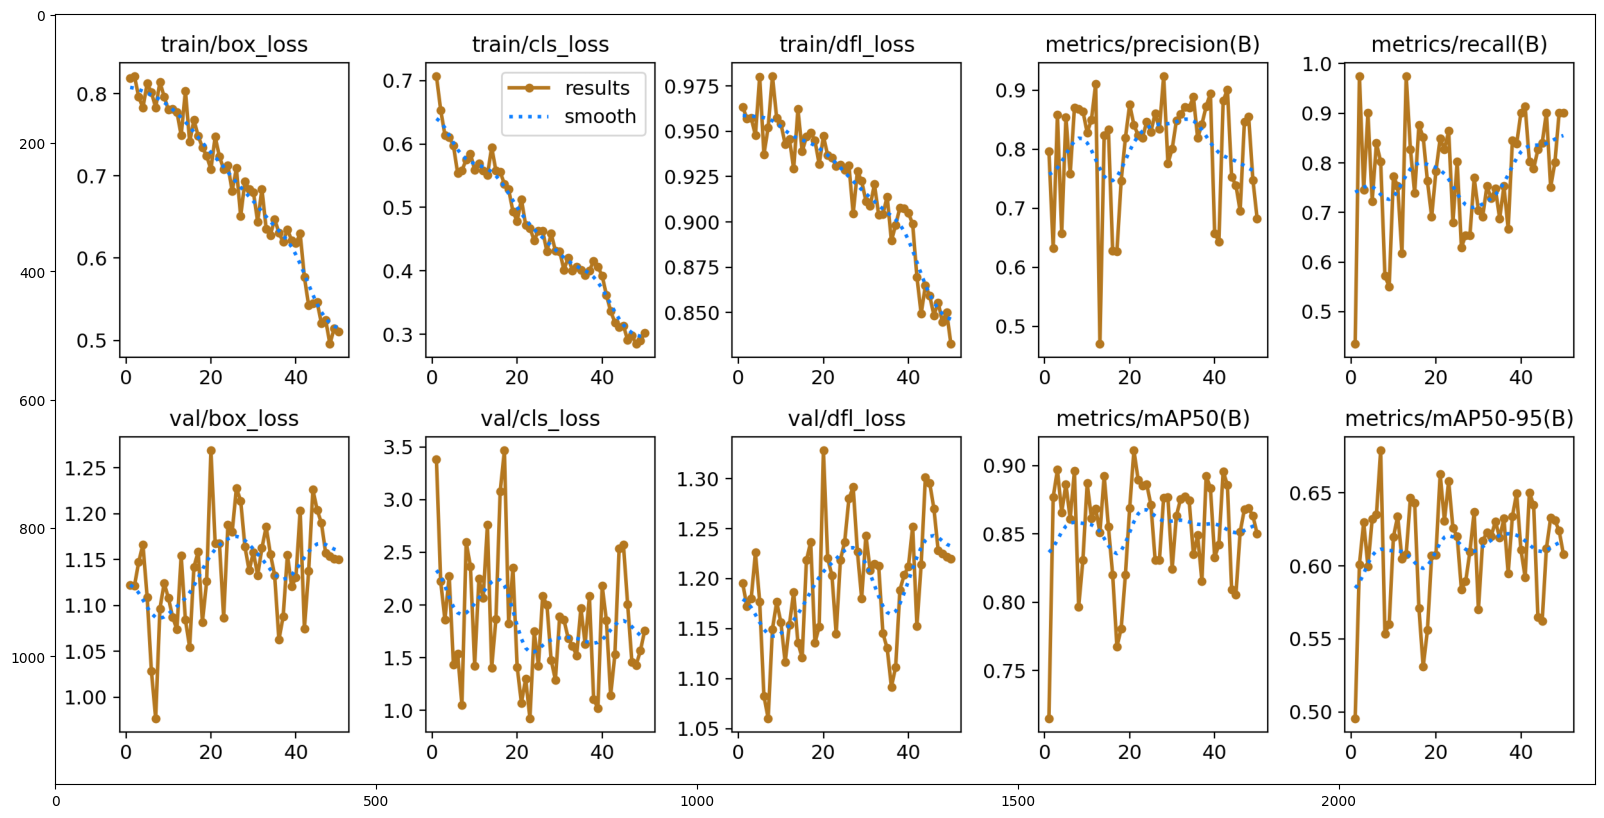

In [33]:
import cv2
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join('/kaggle/working/runs/detect/train45', 'results.png'))
plt.imshow(img)
plt.show()

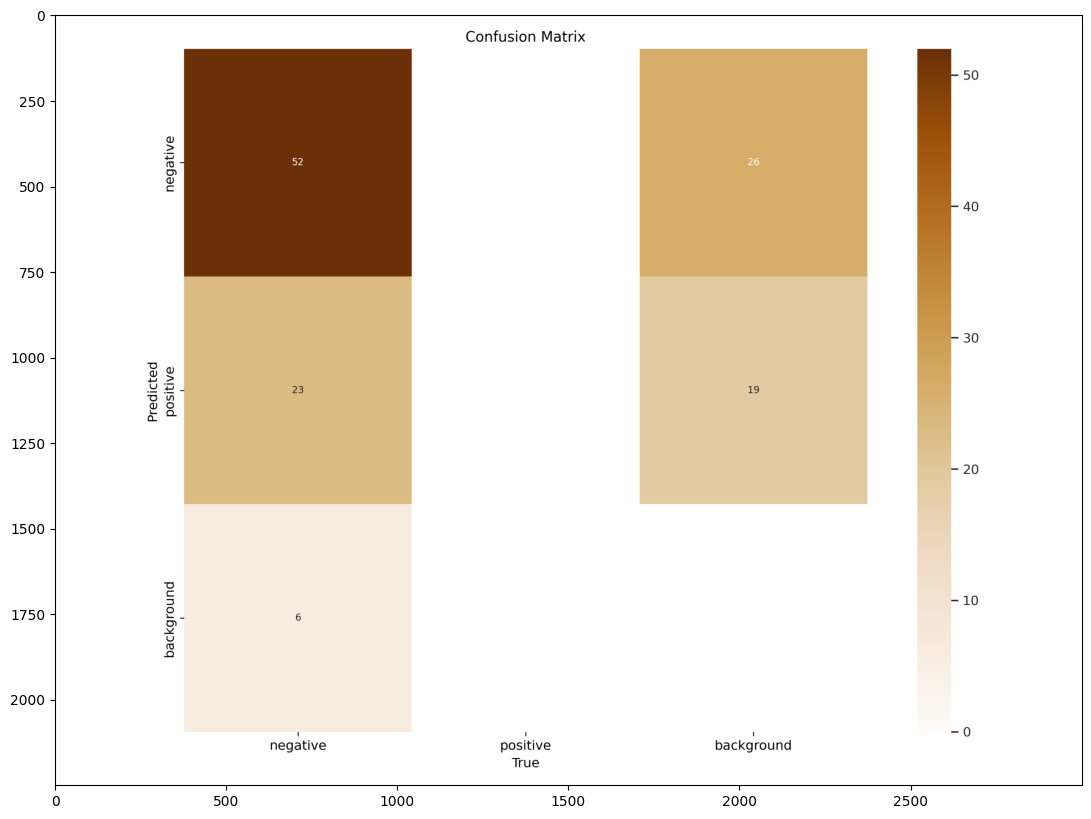

In [34]:
import cv2
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join('/kaggle/working/runs/detect/train45', 'confusion_matrix.png'))
plt.imshow(img)
plt.show()

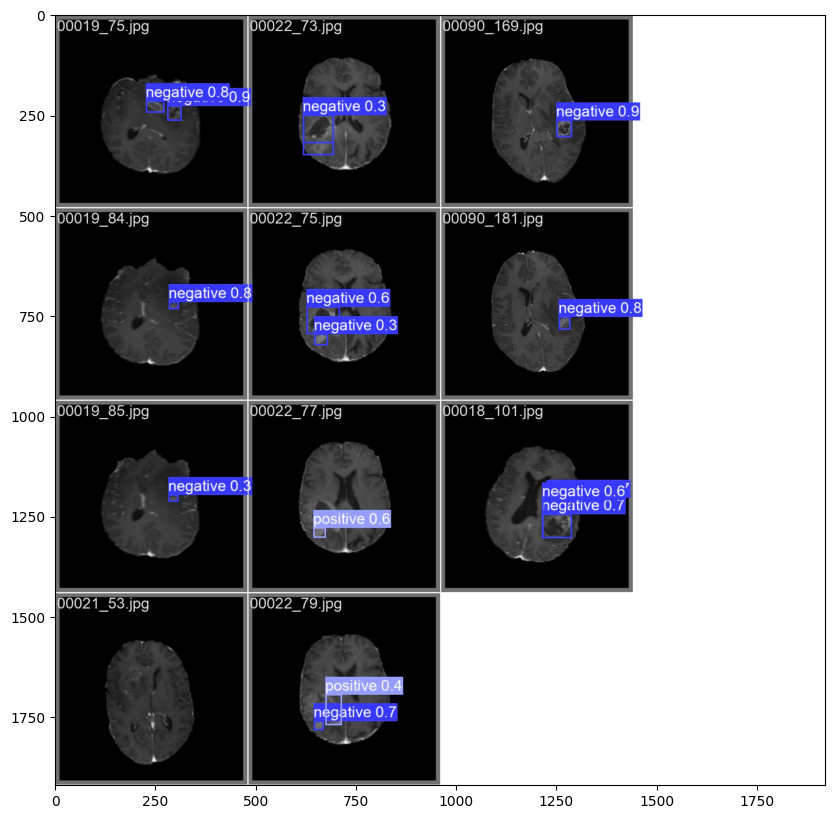

In [36]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join('/kaggle/working/runs/detect/train45', 'val_batch2_pred.jpg'))
plt.imshow(img)
plt.show()

In [37]:
model=YOLO('/kaggle/working/runs/detect/train45/weights/best.pt')
model.val()
metrics = model.val()  
metrics.box.map  
metrics.box.map50  
metrics.box.map75  
metrics.box.maps  

Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


                   all         75         81      0.863      0.802      0.896      0.676
              negative         75         81      0.863      0.802      0.896      0.676
Speed: 0.3ms preprocess, 15.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val3
Ultralytics YOLOv8.2.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /kaggle/working/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


                   all         75         81      0.863      0.802      0.896      0.676
              negative         75         81      0.863      0.802      0.896      0.676
Speed: 0.4ms preprocess, 9.5ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/val4


array([    0.67641,     0.67641])

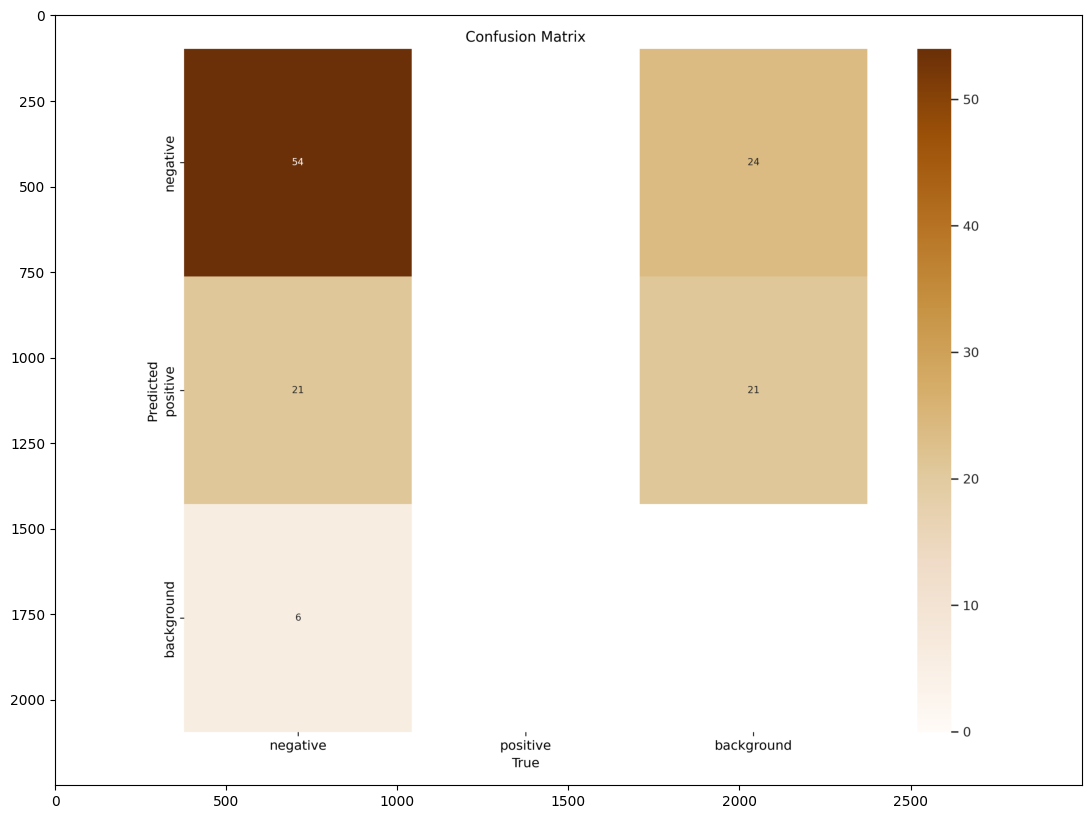

In [38]:
import cv2
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join('/kaggle/working/runs/detect/val3', 'confusion_matrix.png'))
plt.imshow(img)
plt.show()

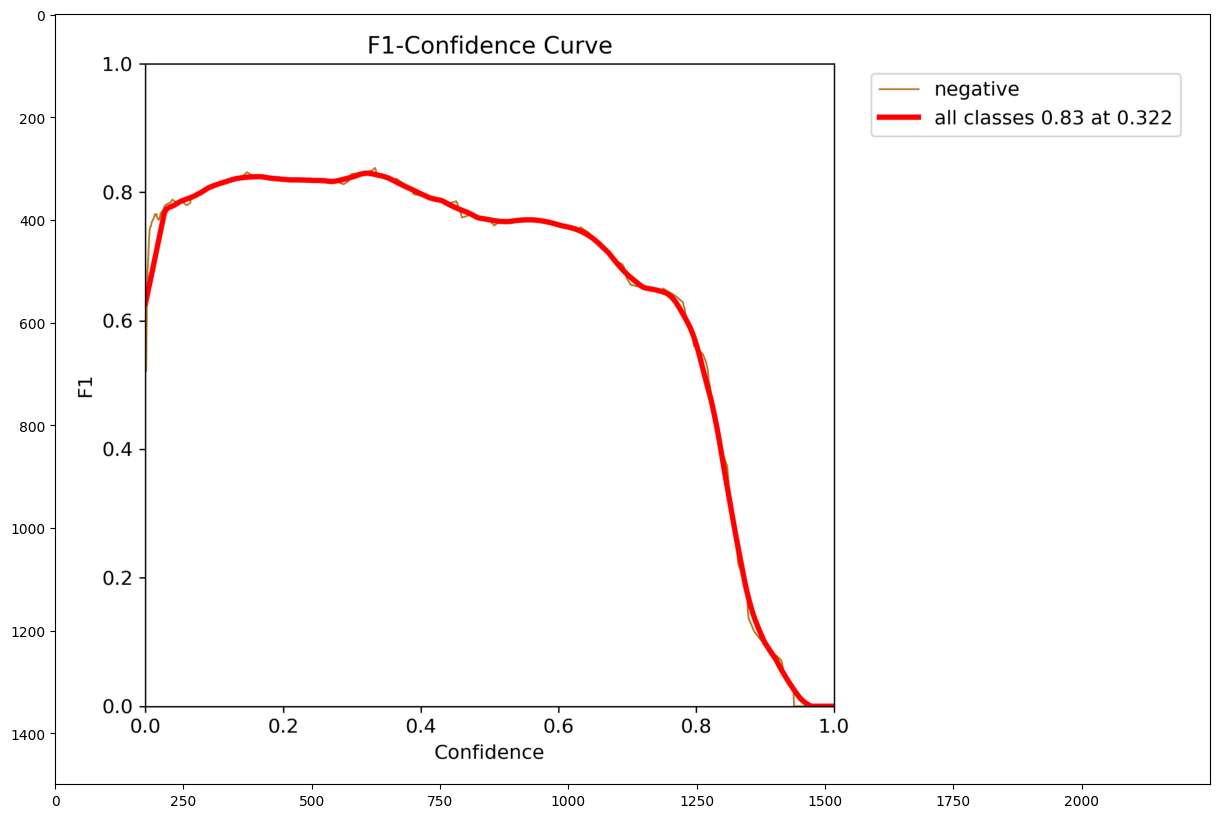

In [39]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join('/kaggle/working/runs/detect/val4', 'F1_curve.png'))
plt.imshow(img)
plt.show()